In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [41]:
df = pd.read_csv("C:/Users/Amir/Downloads/206clean.csv")

In [43]:
df.head()

,Year,Kilometers,Model,Name,Price,has_panorama
0,1388,377000,2,پژو 206,277000000,False
1,1397,118000,2,پژو 206,420000000,False
2,1401,0,3,پژو 206,630000000,True
3,1394,330000,5,پژو 206,345000000,False
4,1383,420000,2,پژو 206,220000000,False


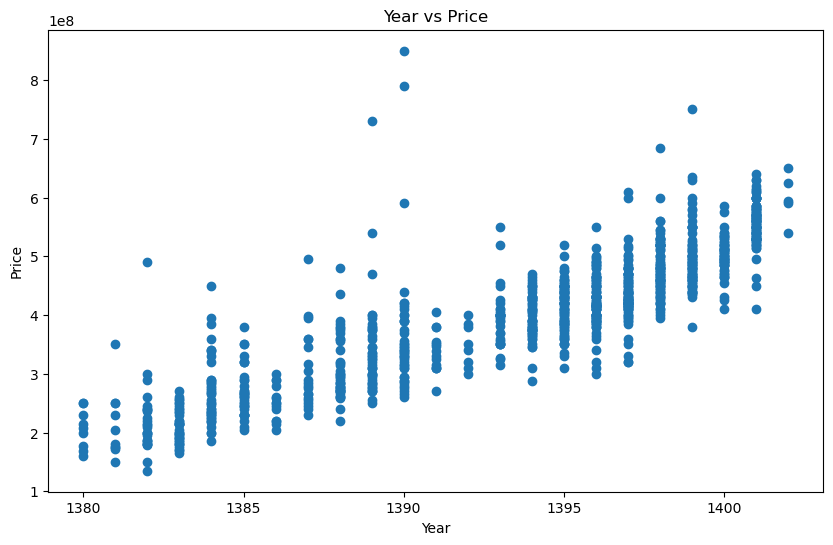

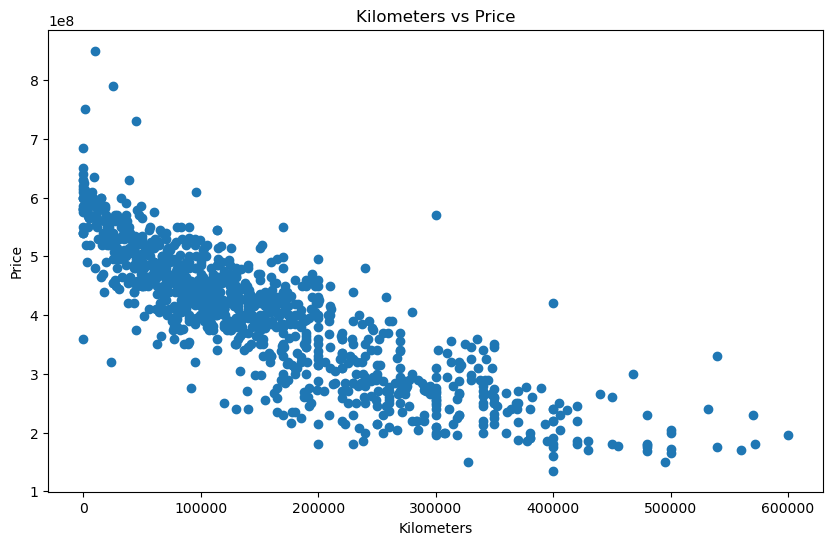

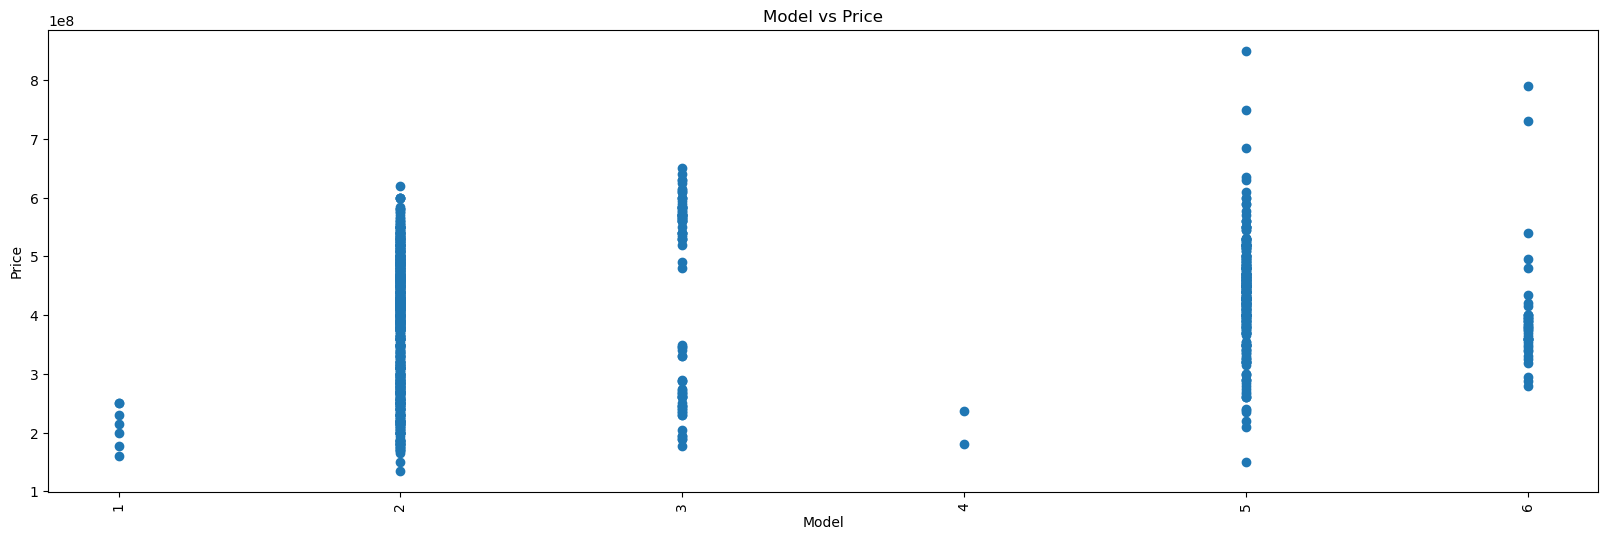

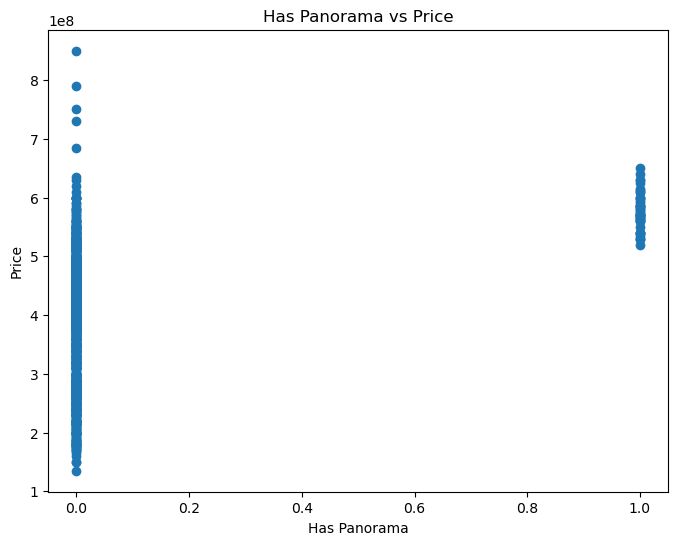

In [45]:
# plot Year vs Price , Kilometers vs Price , Model vs Price , has_panorama vs Price

import matplotlib.pyplot as plt

# Year vs Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year vs Price')
plt.show()

# Kilometers vs Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Kilometers'], df['Price'])
plt.xlabel('Kilometers')
plt.ylabel('Price')
plt.title('Kilometers vs Price')
plt.show()

# Model vs Price (This might be less informative due to many unique models)
plt.figure(figsize=(20, 6))
plt.scatter(df['Model'], df['Price'])
plt.xlabel('Model')
plt.ylabel('Price')
plt.title('Model vs Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# has_panorama vs Price
plt.figure(figsize=(8, 6))
plt.scatter(df['has_panorama'], df['Price'])
plt.xlabel('Has Panorama')
plt.ylabel('Price')
plt.title('Has Panorama vs Price')
plt.show()

In [67]:
# Defining the features (independent variables) to be used in the model
Features = ['Year', 'Kilometers', 'Model', 'has_panorama']  # List of column names representing features
X = df[Features]  # Create a new DataFrame `X` with only the selected features

# Defining the target variable (dependent variable) for the model
Y = df['Price']  # Set `Y` as the 'Price' column in `df`


In [69]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training (70%) and testing (30%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=20)

# Displaying the shape of each split to verify the split sizes
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape


((708, 4), (708,), (304, 4), (304,))

In [71]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model by calculating the Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 29050645.852433957


In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Creating a Random Forest model with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the Random Forest model on the training data
rf_model.fit(X_train, Y_train)

# Making predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest model by calculating the Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(Y_test, y_pred_rf)
print(f'Mean Absolute Error (Random Forest): {mae_rf}')


Mean Absolute Error (Random Forest): 25538426.57424812


In [75]:
# Import necessary library
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Identifying text (categorical) columns in X_train and converting them to 'category' dtype
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].astype('category')
        X_test[col] = X_test[col].astype('category')

# Creating an XGBoost model with categorical feature support enabled
xgb_model = XGBRegressor(n_estimators=100, random_state=42, enable_categorical=True)

# Training the XGBoost model on the training data
xgb_model.fit(X_train, Y_train)

# Making predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating the XGBoost model by calculating the Mean Absolute Error (MAE)
mae_xgb = mean_absolute_error(Y_test, y_pred_xgb)
print(f'Mean Absolute Error (XGBoost): {mae_xgb}')


Mean Absolute Error (XGBoost): 25873641.42105263


In [77]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Combine feature names with their importance scores and sort them in descending order
feature_importance = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Display each feature's importance
for feature, importance in feature_importance:
    print(f'{feature}: {importance}')


Year: 0.6488522990403196
Kilometers: 0.29072661688314655
Model: 0.06000235545000875
has_panorama: 0.0004187286265251016


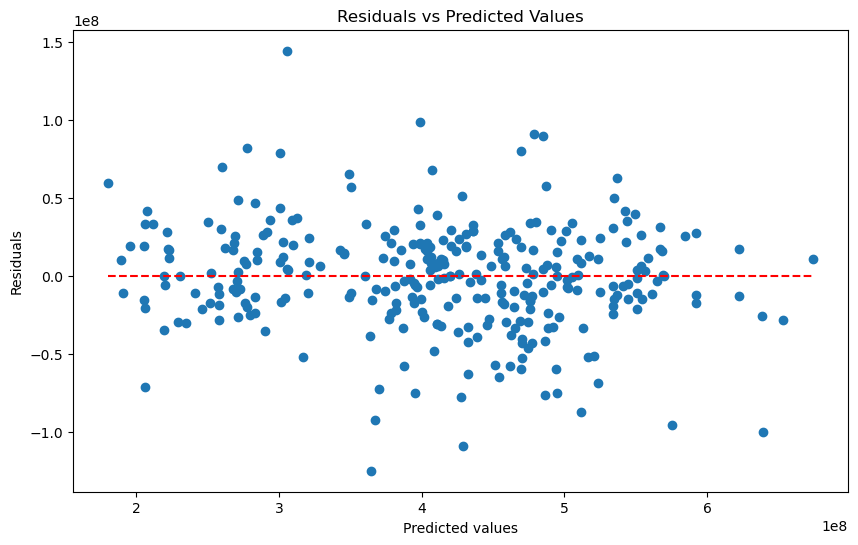

In [79]:
import matplotlib.pyplot as plt

# Calculate residuals (the difference between actual and predicted values)
residuals = Y_test - y_pred_rf

# Create a scatter plot of residuals versus predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals)
plt.hlines(y=0, xmin=min(y_pred_rf), xmax=max(y_pred_rf), colors='r', linestyles='dashed')  # reference line at zero
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


In [81]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the Random Forest model
scores = cross_val_score(rf_model, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')

# Output the mean of the cross-validated MAE scores
print(f'Cross-validated MAE: {-scores.mean()}')


Cross-validated MAE: 27017033.188849412


In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],              # Number of trees in the forest
    'max_features': ['sqrt', 'log2', None],      # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30],             # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],               # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]                   # Whether bootstrap samples are used
}

# Initialize the Random Forest model
model = RandomForestRegressor()

# Setup GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

# Output the best parameters and the corresponding MAE score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated MAE:", -grid_search.best_score_)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validated MAE: 24952101.615620513


In [85]:
# Define the best parameters from GridSearchCV
best_params = {
    'bootstrap': True,
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 10,
    'n_estimators': 200
}

# Create a Random Forest model with the best parameters
model = RandomForestRegressor(**best_params)

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, y_pred)

# Output the Mean Absolute Error of the best model
print("Mean Absolute Error with Best Model:", mae)


Mean Absolute Error with Best Model: 23888967.918166872
